In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

DATASET = Path("datasets/lotto/data_processed.csv")

In [ ]:
# Read into data frame
dataset = pd.read_csv(DATASET, header=0, sep=',', quotechar='"', parse_dates=['DrawDate'], dtype={'PrizeType': str})

In [ ]:
df = dataset.copy()

In [ ]:
df.columns

In [ ]:
df.info()

In [5]:
#df.dtypes

### Tensor operations

In [2]:
from __future__ import print_function
import operator
import torch
from torch import tensor

In [5]:
m1 = tensor(np.arange(1,10,1))
m1

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
m1.shape

torch.Size([9])

In [7]:
m1.view(3,3)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [8]:
m1.unsqueeze(0)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [9]:
m1.unsqueeze(1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [10]:
m1[None,:]

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [11]:
m1[:, None]

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [15]:
?torch.unsqueeze

Docstring:
unsqueeze(input, dim) -> Tensor

Returns a new tensor with a dimension of size one inserted at the
specified position.

The returned tensor shares the same underlying data with this tensor.

A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
applied at :attr:`dim` = ``dim + input.dim() + 1``.

Args:
    input (Tensor): the input tensor.
    dim (int): the index at which to insert the singleton dimension

Example::

    >>> x = torch.tensor([1, 2, 3, 4])
    >>> torch.unsqueeze(x, 0)
    tensor([[ 1,  2,  3,  4]])
    >>> torch.unsqueeze(x, 1)
    tensor([[ 1],
            [ 2],
            [ 3],
            [ 4]])
Type:      builtin_function_or_method


In [20]:
x = torch.tensor([1,2,3,4])
print(x.shape, x)
y = torch.unsqueeze(x,0)
print(y.shape, y)
y = torch.unsqueeze(x,1)
print(y.shape, y)

torch.Size([4]) tensor([1, 2, 3, 4])
torch.Size([1, 4]) tensor([[1, 2, 3, 4]])
torch.Size([4, 1]) tensor([[1],
        [2],
        [3],
        [4]])


In [23]:
?torch.empty

Docstring:
empty(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor

Returns a tensor filled with uninitialized data. The shape of the tensor is
defined by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :

In [28]:
x = torch.empty(5,3)
x.shape, x

(torch.Size([5, 3]),
 tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]))

In [26]:
x = torch.empty(1,5,3) 
x.shape, x

(torch.Size([1, 5, 3]),
 tensor([[[1.1210e-44, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]]]))

In [29]:
x = torch.rand(5,3)
x

tensor([[0.3241, 0.0215, 0.4287],
        [0.1927, 0.7167, 0.5681],
        [0.3061, 0.8101, 0.0186],
        [0.1976, 0.2463, 0.3205],
        [0.0907, 0.5189, 0.6617]])

In [31]:
x = torch.zeros(5,3, dtype=torch.float)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [32]:
x = torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [33]:
x = x.new_ones(5,3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [34]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.6646, -1.3416, -0.7051],
        [-0.2318,  1.3066,  1.6423],
        [-1.8371,  0.9593,  1.5381],
        [-0.5668,  0.2819,  1.1210],
        [ 1.3762, -0.2620,  1.0973]])

In [35]:
x.size()

torch.Size([5, 3])

In [36]:
y = torch.rand(5,3)

In [37]:
x+y

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [38]:
torch.add(x,y)

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [39]:
print(torch.add(x,y))

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])


In [40]:
result = torch.empty(5,3)
torch.add(x,y, out=result)
result

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [41]:
y.add_(x)
y

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [42]:
z = torch.empty(5,3)
z.copy_(y)
z

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [46]:
z.t_()
z

tensor([[ 0.9491, -1.3252, -0.5420],
        [ 0.1703,  1.4707,  1.7180],
        [-1.1559,  1.6384,  2.1097],
        [ 0.2242,  0.6419,  2.0776],
        [ 2.1598, -0.0729,  1.3510]])

In [47]:
print(x)
print(x[:,1])

tensor([[ 0.6646, -1.3416, -0.7051],
        [-0.2318,  1.3066,  1.6423],
        [-1.8371,  0.9593,  1.5381],
        [-0.5668,  0.2819,  1.1210],
        [ 1.3762, -0.2620,  1.0973]])
tensor([-1.3416,  1.3066,  0.9593,  0.2819, -0.2620])


In [48]:
x = torch.rand(4,4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(),y.size(), z.size())
print(x,y,z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[0.6800, 0.5682, 0.8101, 0.6739],
        [0.0190, 0.6950, 0.2429, 0.1885],
        [0.8962, 0.5534, 0.5090, 0.5022],
        [0.7804, 0.1696, 0.0247, 0.0464]]) tensor([0.6800, 0.5682, 0.8101, 0.6739, 0.0190, 0.6950, 0.2429, 0.1885, 0.8962,
        0.5534, 0.5090, 0.5022, 0.7804, 0.1696, 0.0247, 0.0464]) tensor([[0.6800, 0.5682, 0.8101, 0.6739, 0.0190, 0.6950, 0.2429, 0.1885],
        [0.8962, 0.5534, 0.5090, 0.5022, 0.7804, 0.1696, 0.0247, 0.0464]])


In [49]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.0095])
0.00954516977071762


In [50]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [51]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [52]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [53]:
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [54]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)


[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [55]:
np.add(a, 1, out=a)

array([2., 2., 2., 2., 2.])

In [56]:
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [57]:
b.storage()

 2.0
 2.0
 2.0
 2.0
 2.0
[torch.DoubleStorage of size 5]

In [59]:
b.abs()

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [60]:
(b*b).sum().sqrt()

tensor(4.4721, dtype=torch.float64)

In [61]:
b.shape

torch.Size([5])

In [62]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [63]:
m1 = tensor([[1., 2, 3], [4,5,6], [7,8,9]], dtype=torch.float); m1

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [64]:
m2 = tensor([[1., 2, 3], [4,5,6], [7,8,9]], dtype=torch.float); m2

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [65]:
%timeit -n 10 _ = matmul(m1,m2)

The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
443 µs ± 246 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [67]:
torch.allclose?

Docstring:
allclose(input, other, rtol=1e-05, atol=1e-08, equal_nan=False) -> bool

This function checks if all :attr:`input` and :attr:`other` satisfy the condition:

.. math::
    \lvert \text{input} - \text{other} \rvert \leq \texttt{atol} + \texttt{rtol} \times \lvert \text{other} \rvert

elementwise, for all elements of :attr:`input` and :attr:`other`. The behaviour of this function is analogous to
`numpy.allclose <https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html>`_

Args:
    input (Tensor): first tensor to compare
    other (Tensor): second tensor to compare
    atol (float, optional): absolute tolerance. Default: 1e-08
    rtol (float, optional): relative tolerance. Default: 1e-05
    equal_nan (bool, optional): if ``True``, then two ``NaN`` s will be considered equal. Default: ``False``

Example::

    >>> torch.allclose(torch.tensor([10000., 1e-07]), torch.tensor([10000.1, 1e-08]))
    False
    >>> torch.allclose(torch.tensor([10000., 1e-08]), torch.t

In [68]:
c = tensor([1,2,3])
c.shape

torch.Size([3])

In [69]:
t = c.expand_as(m1)
t

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [88]:
t.stride()

(0, 1)

### Broadcasting

In [71]:
c[None,:]

tensor([[1, 2, 3]])

In [72]:
c[:, None]

tensor([[1],
        [2],
        [3]])

In [73]:
c[None,:] * c[:,None]

tensor([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]])

In [74]:
c[None,:] @ c[:,None]

tensor([[14]])

In [75]:
c[None,:] > c[:, None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [78]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        # c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i] = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [79]:
%timeit -n 10 _=matmul(m1,m2)

The slowest run took 6.11 times longer than the fastest. This could mean that an intermediate result is being cached.
149 µs ± 129 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Einstein summation

In [80]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [81]:
%timeit -n 10 _=matmul(m1,m2)

The slowest run took 35.72 times longer than the fastest. This could mean that an intermediate result is being cached.
280 µs ± 565 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### pytorch op

In [82]:
%timeit -n 10 m1.matmul(m2)

The slowest run took 406.52 times longer than the fastest. This could mean that an intermediate result is being cached.
224 µs ± 538 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [83]:
%timeit -n 10 t2= m1@m2

The slowest run took 23.26 times longer than the fastest. This could mean that an intermediate result is being cached.
31.8 µs ± 49 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [84]:
#test_near(t1,t2)

In [ ]:
!python notebook2script.py 01_basic.ipynb

### chain rule

### tensor ops

In [110]:
#preds = torch.rand(10,1)
preds = torch.randint(0,2, (10,1))
targs = torch.randint(0,2, (10,1))
print(preds.shape, targs.shape)
print(preds)
print(targs)

torch.Size([10, 1]) torch.Size([10, 1])
tensor([[0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])
tensor([[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1]])


In [108]:
# torch.nonzero(preds > 0.5)
# preds[torch.nonzero(preds > 0.5)]
preds[preds > 0.5]

tensor([0.9416, 0.7571, 0.7640, 0.5057, 0.5663, 0.5435])

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, make_scorer, recall_score, roc_curve, mean_squared_error, accuracy_score, average_precision_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import matplotlib
%matplotlib inline

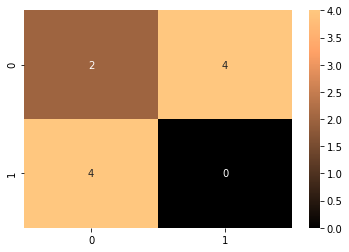

In [114]:
conf_matrix = confusion_matrix(targs, preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.copper)
plt.show()

In [4]:
preds = torch.rand(5,2)
preds

tensor([[0.1936, 0.6673],
        [0.8174, 0.7016],
        [0.4848, 0.9997],
        [0.0095, 0.9354],
        [0.1782, 0.3274]])